# Aufgabe 1.1

Given P(X|Y=0) = 2 - 2x and P(X|Y=1) = 2x compute the associated CDFs:

 - $F_{X|Y=0}(X) = \int_{0}^{x} 2 - 2x \,dx = 2x - x²$
 - $F_{X|Y=1}(X) = \int_{0}^{x} 2x \,dx = x²$
 
 
\
Now transform the CDFs to the inverse functions:
 - $F^{-1}_{X|Y=0}(y) = 1 - \sqrt{(1 - y)}$
 - $F^{-1}_{X|Y=1}(y) = \sqrt{(y)}$ 
 
 
\
Those inverse functions are now used for the inverse transform sampling:

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:

def create_data(N):
  """
  Creates a data set of size N according to the above inversed sampling method
  """
    x_0 = []
    x_1 = []
    y = []
    
    for i in range(N):
        # create y € {0, 1}
        y_value = np.random.randint(0, 2)
        y.append(y_value)

        if y_value == 0:
            x_0.append(1 - np.sqrt(1 - np.random.rand()))
              
        else:
            x_1.append(np.sqrt(np.random.rand()))
            
    return x_0, x_1, y

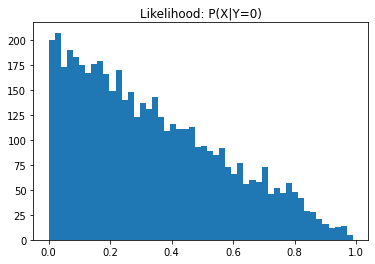

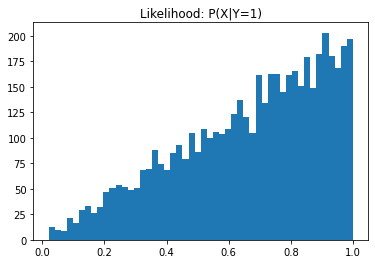

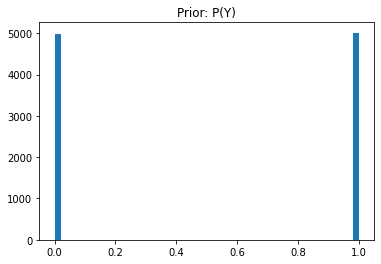

In [ ]:
"""
Plot the prior and likelihoods
"""

n_bins = 50

x_0, x_1, y = create_data(10000)

plt.hist(x_0, bins=n_bins)
plt.title("Likelihood: P(X|Y=0)")
plt.show()

plt.hist(x_1, bins=n_bins)
plt.title("Likelihood: P(X|Y=1)")
plt.show()

plt.hist(y, bins=n_bins)
plt.title("Prior: P(Y)")
plt.show()

# Aufgabe 1.2

In [ ]:
def testing_data(M):
  """
  Creates a data set of size N according to the above inversed sampling method
  We ensure that every data set contains one instance of either class
  """
    while True:
        testing_set = []
        for i in range(M):
            # create y € {0, 1}
            y_value = np.random.randint(0, 2)

            if y_value == 0:
                testing_set.append((1 - np.sqrt(1 - np.random.rand()), y_value))

            else:
                testing_set.append((np.sqrt(np.random.rand()), y_value))
                
        labels = []
        for elem in testing_set:
            labels.append(elem[1])

        if 0 in labels and 1 in labels:
            break

    return testing_set

In [ ]:
def threshold_classifier(testing_set, threshold):
  """
  Implements the threshold classifier based on Rule A
  """
  classification = []
  for tupel in testing_set:
    if tupel[0] < threshold:
      classification.append(0)
    else:
      classification.append(1)
  return classification

def threshold_anticlassifier(testing_set, threshold):
  """
  Implements the threshold classifier based on Rule B
  """
  classification = []
  for tupel in testing_set:
    if tupel[0] >= threshold:
      classification.append(0)
    else:
      classification.append(1)
  return classification

In [ ]:
def calculateErrorRate(threshold, M):
  """
  Calculates the error rate for the classifier based on Rule A
  """
  test_data = testing_data(M)
  y_hat = threshold_classifier(test_data, threshold)
  count_right = 0
  count_wrong = 0
  for test,y in zip(test_data,y_hat):
    if test[1] == y:
      count_right += 1
    else:
      count_wrong += 1
  result = count_wrong/(count_wrong+count_right)
  return result


In [ ]:
def calculateErrorRateAnti(threshold, M):
  """
  Calculates the error rate for the classifier based on Rule B
  """
  test_data = testing_data(M)
  y_hat = threshold_anticlassifier(test_data, threshold)
  count_right = 0
  count_wrong = 0
  for test,y in zip(test_data,y_hat):
    if test[1] == y:
      count_right += 1
    else:
      count_wrong += 1
  result = count_wrong/(count_wrong+count_right)
  return result

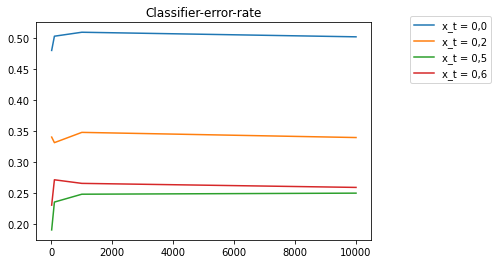

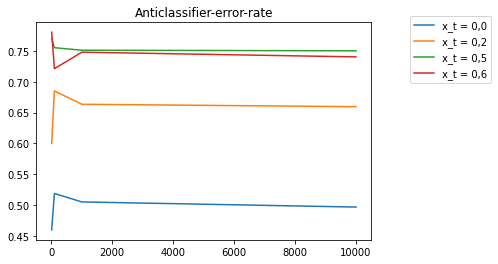

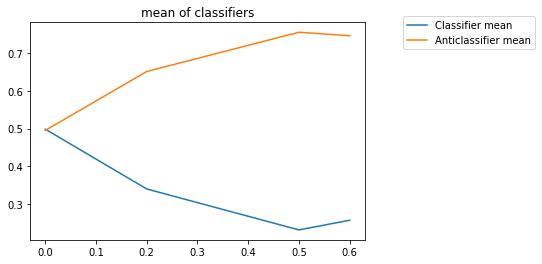

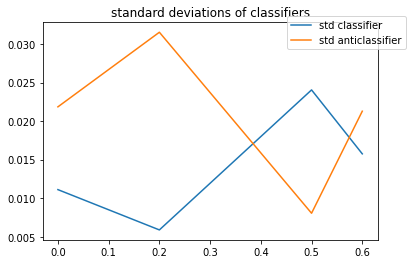

In [ ]:
"""
Plots the error rates,means and standard derivation for thresholds based on Rule A and B
"""
M = [10,100,1000,10000]
x_t = [.0,.2,.5,.6]
error = []
error_anti = []
for j in x_t:
  for i in M:
    error_value = 0
    error_value_anti = 0
    for m in range(10):
      error_value += calculateErrorRate(j,i)
      error_value_anti += calculateErrorRateAnti(j,i)
    error_value_anti /= 10
    error_anti.append((j,i,error_value_anti))
    error_value /= 10
    error.append((j,i,error_value))

x_first = []
y_first = []
for i in range(4):
  y_first.append(error[i][2])
  x_first.append(error[i][1])

x_second = []
y_second = []
for i in range(4,8):
  y_second.append(error[i][2])
  x_second.append(error[i][1])


x_third = []
y_thrid = []
for i in range(8,12):
  y_thrid.append(error[i][2])
  x_third.append(error[i][1])

x_forth = []
y_forth = []
for i in range(12,16):
  y_forth.append(error[i][2])
  x_forth.append(error[i][1])


#print(np.mean(y_first))
x_mean = [.0,.2,.5,.6]
y_mean = [np.mean(y_first),np.mean(y_second),np.mean(y_thrid),np.mean(y_forth)]

y_std = [np.std(y_first),np.std(y_second),np.std(y_thrid),np.std(y_forth)]

plt.plot(x_first,y_first)
plt.plot(x_second,y_second)
plt.plot(x_third,y_thrid)
plt.plot(x_forth,y_forth)
plt.title("Classifier-error-rate")
plt.legend(("x_t = 0,0","x_t = 0,2", "x_t = 0,5","x_t = 0,6"),bbox_to_anchor=(1.1, 1.05))
plt.show()

x_first = []
y_first = []
for i in range(4):
  y_first.append(error_anti[i][2])
  x_first.append(error_anti[i][1])

x_second = []
y_second = []
for i in range(4,8):
  y_second.append(error_anti[i][2])
  x_second.append(error_anti[i][1])


x_third = []
y_thrid = []
for i in range(8,12):
  y_thrid.append(error_anti[i][2])
  x_third.append(error_anti[i][1])

x_forth = []
y_forth = []
for i in range(12,16):
  y_forth.append(error_anti[i][2])
  x_forth.append(error_anti[i][1])



x_mean_anti = [.0,.2,.5,.6]
y_mean_anti = [np.mean(y_first),np.mean(y_second),np.mean(y_thrid),np.mean(y_forth)]

y_std_anti = [np.std(y_first),np.std(y_second),np.std(y_thrid),np.std(y_forth)]



plt.plot(x_first,y_first)
plt.plot(x_second,y_second)
plt.plot(x_third,y_thrid)
plt.plot(x_forth,y_forth)
plt.title("Anticlassifier-error-rate")
plt.legend(("x_t = 0,0","x_t = 0,2", "x_t = 0,5","x_t = 0,6"),bbox_to_anchor=(1.1, 1.05))
plt.show()

plt.plot(x_mean,y_mean)
plt.plot(x_mean_anti,y_mean_anti)
plt.title("mean of classifiers")
plt.legend(("Classifier mean","Anticlassifier mean"),bbox_to_anchor=(1.1, 1.05))
plt.show()

plt.plot(x_mean,y_std)
plt.plot(x_mean,y_std_anti)
plt.title("standard deviations of classifiers")
plt.legend(("std classifier","std anticlassifier"),bbox_to_anchor=(1.1, 1.05))
plt.show()



# Aufgabe 1.3

In [ ]:
def threshold_classifier_guessing(testing_set):
  """
  Implements the threshold classifier based on Rule C
  """
  classification = []
  for i in testing_set:
    classification.append(np.random.randint(0, 2))
    
  return classification

In [ ]:
def threshold_classifier_constant(testing_set):
  """
  Implements the threshold classifier based on Rule D
  """
  classification = []
  for i in testing_set:
    classification.append(1)
  return classification

In [ ]:
def calculateErrorRate_guessing(M):
  """
  Calculates the error rate for the classifier based on Rule C
  """
  test_data = testing_data(M)
  y_hat = threshold_classifier_guessing(test_data)
  count_right = 0
  count_wrong = 0
  for test,y in zip(test_data,y_hat):
    if test[1] == y:
      count_right += 1
    else:
      count_wrong += 1
  result = count_wrong/(count_wrong+count_right)
  return result

In [ ]:
def calculateErrorRate_constant(M):
  """
  Calculates the error rate for the classifier based on Rule D
  """
  test_data = testing_data(M)
  y_hat = threshold_classifier_constant(test_data)
  count_right = 0
  count_wrong = 0
  for test,y in zip(test_data,y_hat):
    if test[1] == y:
      count_right += 1
    else:
      count_wrong += 1
  result = count_wrong/(count_wrong+count_right)
  return result

In [ ]:
"""
Plots the error rates,means and standard derivation for thresholds based on Rule C and D
"""
error_guessing = []
error_constant = []

for i in M:
  error_value_guessing = 0
  error_value_constant = 0
  for m in range(10):
    error_value_guessing += calculateErrorRate_guessing(i)
    error_value_constant += calculateErrorRate_constant(i)
  error_value_constant /= 10
  error_constant.append((i,error_value_constant))
  error_value_guessing /= 10
  error_guessing.append((i,error_value_guessing))

In [ ]:
y_guessing = []
x_guessing = []
for err in error_guessing:
  y_guessing.append(err[1])
  x_guessing.append(err[0])

y_constant = []
x_constant = []
for err in error_constant:
  y_constant.append(err[1])
  x_constant.append(err[0])



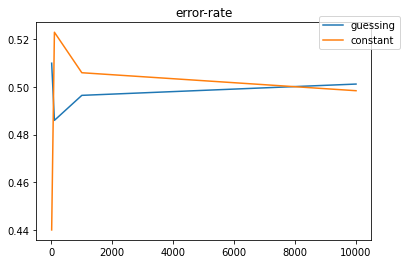

In [ ]:
plt.plot(x_guessing,y_guessing)
plt.plot(x_constant,y_constant)
plt.title("error-rate")
plt.legend(("guessing","constant"),bbox_to_anchor=(1.1, 1.05))
plt.show()



0.008660119802866498
0.031235103949723


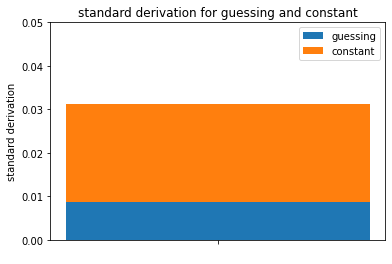

In [ ]:
"""
Plot for the standard derivation of Rule C and Rule D
"""
y_std_guessing = np.std(y_guessing)
y_std_constant = np.std(y_constant)

print(y_std_guessing)
print(y_std_constant)

ind = np.arange(1)


p1 = plt.bar(ind, y_std_guessing)
p2 = plt.bar(ind, (y_std_constant-y_std_guessing),
             bottom=y_std_guessing)

plt.ylabel('standard derivation')
plt.title('standard derivation for guessing and constant')
plt.xticks(ind, (' ', ' '))
plt.yticks(np.arange(0, 0.051, 0.01))
plt.legend((p1[0], p2[0]), ('guessing', 'constant'))

plt.show()

# Aufgabe 1.4


In [ ]:
def toy_nearest_neighbor(Xtest, Xtrain, Ytrain):
  """
  Implements the nearest neighbor classifier
  """
  y_test = 0
  shortest_distance = 0
  for i,(x,y) in enumerate(zip(Xtrain,Ytrain)):
    distance = abs(Xtest-x)
    if(i == 0):
      shortest_distance = distance
      y_test = y
    if(distance < shortest_distance):
      y_test = y
      
  return y_test



In [ ]:
def calculate_error(N):
  """
  Calculates the error rate for the nearest neighbor classifier
  """
    error_avg_nn = 0
    miss = 0

    for i in range(1000):

        training_set = testing_data(N)
        test_data = testing_data(100)

        for test_elem in test_data:

            # extract xtrain and ytrain

            xtrain = []
            ytrain = []
            for elem in training_set:
                xtrain.append(elem[0])
                ytrain.append(elem[1])

            y_predicted = toy_nearest_neighbor(test_elem[0], xtrain, ytrain)

            if y_predicted != test_elem[1]:
                miss += 1

    error_avg_nn = miss / (1000*100)
    return error_avg_nn

In [ ]:
print("error rate at N = 2: %f" % calculate_error(2))
print("error rate at N = 100: %f" % calculate_error(100))

error rate at N = 2: 0.351210
error rate at N = 100: 0.393490
